In [1]:
# Loading necessary packages for simulation

import pandas as pd
import numpy as np
from pykrige.ok3d import OrdinaryKriging3D
import pykrige.kriging_tools as kt

In [1]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [3]:
col_header = ["x_position", "y_position", "z_position", "variable"]
data_1 = pd.read_csv('Test kriging.csv', names=col_header)

data_1.head()

,x_position,y_position,z_position,variable
0,4,2,1,0.208623
1,4,2,2,0.076783
2,4,2,3,0.086959
3,4,2,4,0.339364
4,4,2,5,0.405747


In [4]:
# Extracting the variables from our dataset as 1-D array

data_1x = data_1['x_position']
data_1y = data_1['y_position']
data_1z = data_1['z_position']
data_v = data_1['variable']

In [5]:
data_v

0      0.208623
1      0.076783
2      0.086959
3      0.339364
4      0.405747
         ...   
475    0.309753
476    0.307114
477    0.307286
478    0.323095
479    0.327295
Name: variable, Length: 480, dtype: float64

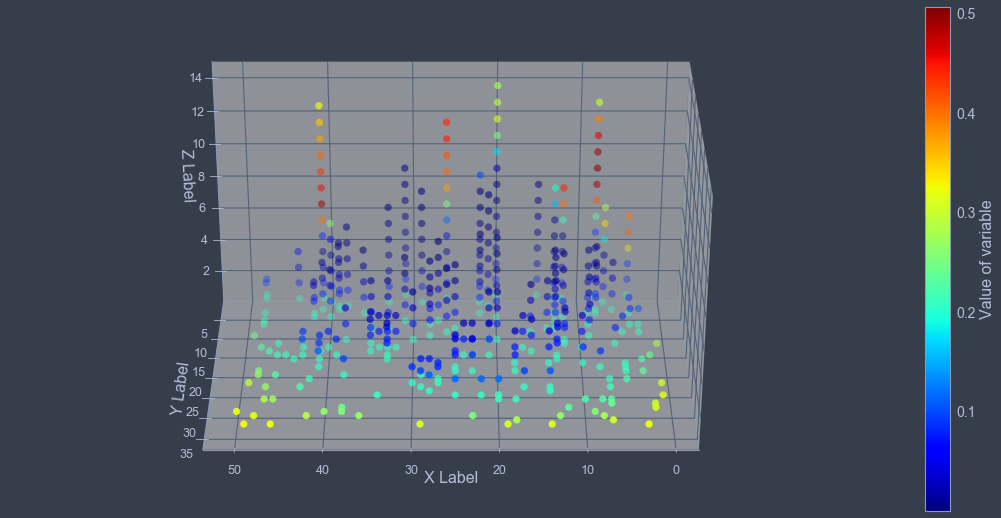

In [6]:
# Loading the packages for plotting the sample data (before kriging estimation)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(15, 7))
ax = Axes3D(fig)
gradient = plt.cm.get_cmap("jet")

# Plotting the sample data
plot3D = ax.scatter(data_1x, data_1y, data_1z, c=data_v, s=50, cmap=gradient)
cbar = plt.colorbar(plot3D)
cbar.ax.tick_params(labelsize=14)

cbar.set_label("Value of variable", fontsize=16)

ax.set_xlabel('X Label', fontsize=16)
ax.set_ylabel('Y Label', fontsize=16)
ax.set_zlabel('Z Label', fontsize=16)
ax.view_init(azim=90)
plt.show()

fig.savefig('Hard data.png')

In [7]:
# Create the 3D ordinary kriging object and solves for the three-dimension kriged
ok3d = OrdinaryKriging3D(data_1x,
                         data_1y,
                         data_1z,
                         data_v,
                         variogram_model='exponential',
                         variogram_parameters={
                             'sill': 0.02,
                             'range': 40,
                             'nugget': 0
                         })

# Preparing a cartesian grid
gridx = np.arange(0, 50, 1.0)
gridy = np.arange(0, 35, 1.0)
gridz = np.arange(0, 14, 1.0)

# Executing the 3d kriging (creation of kriged grid and variance grid for each point)
k3d, ss3d = ok3d.execute('grid', gridx, gridy, gridz)

In [8]:
# Testing and showing the results. note: grid x and grid z are reversed
# np.size(k3d.data), remember, index starts from 0
array_krige = k3d.data.ravel()
k3d.data

array([[[0.29803601, 0.28734951, 0.27578037, ..., 0.23585284,
         0.23687524, 0.23798113],
        [0.29066768, 0.27863146, 0.26613073, ..., 0.23615124,
         0.2394075 , 0.23851747],
        [0.28422076, 0.27156417, 0.25903484, ..., 0.2402137 ,
         0.24740529, 0.24251631],
        ...,
        [0.331575  , 0.32749801, 0.32221678, ..., 0.31567715,
         0.32057031, 0.32571593],
        [0.33308403, 0.33002079, 0.32610265, ..., 0.32126626,
         0.32481648, 0.32881021],
        [0.33473837, 0.33264846, 0.33004476, ..., 0.32661912,
         0.32892262, 0.33144669]],

       [[0.29246513, 0.27831469, 0.26082987, ..., 0.19934263,
         0.2017357 , 0.20671774],
        [0.28231431, 0.26513297, 0.24327436, ..., 0.18878279,
         0.19387042, 0.19852484],
        [0.27280821, 0.25374923, 0.22951575, ..., 0.18482354,
         0.208637  , 0.19660916],
        ...,
        [0.32281446, 0.3179423 , 0.31178021, ..., 0.30533374,
         0.31111634, 0.31763942],
        [0.3

In [9]:
dx = []
for i in np.arange(0, 50, 1.0):
    dx.extend(np.repeat(i, 14 * 35))
print(dx)
len(dx)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

24500

In [10]:
dz = np.tile(gridz, 35*50)
print(dz)

dz.shape

[ 0.  1.  2. ... 11. 12. 13.]


(24500,)

In [11]:
dy_old = []
for i in np.arange(0, 35, 1.0):
    dy_old.extend(np.repeat(i, 14))
print(dy_old)
len(dy_old)

dy = np.tile(dy_old, 50)
len(dy)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0,

24500

In [12]:
print(len(dx))
print(len(dy))
print(len(dz))
print(len(array_krige))

24500
24500
24500
24500


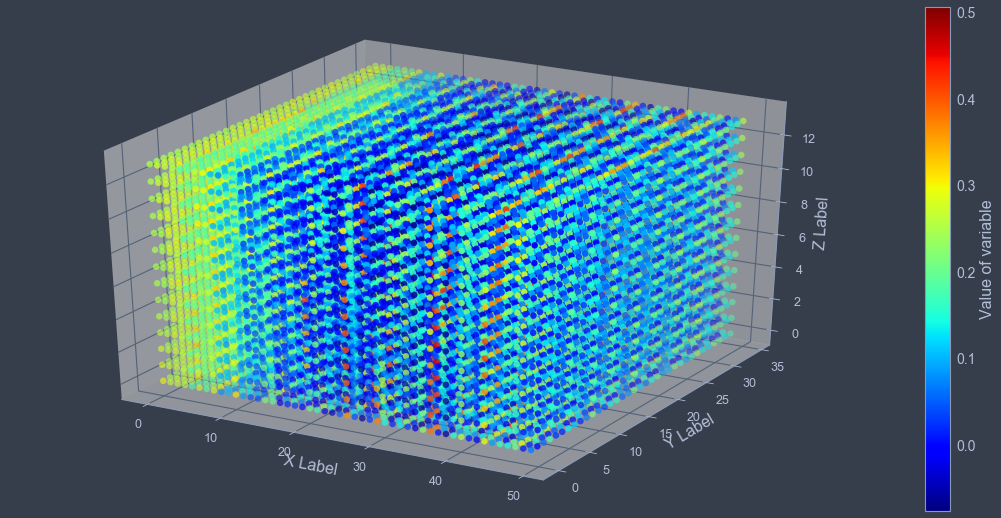

In [13]:
fig_krig3d = plt.figure(figsize=(15, 7))
ax_krig3d = Axes3D(fig_krig3d)

# Plotting the kriged data
plot3D_2 = ax_krig3d.scatter(dx, dy, dz, c=array_krige, s=40, cmap=gradient)
cbar_2 = plt.colorbar(plot3D_2)
cbar_2.ax.tick_params(labelsize=14)

cbar_2.set_label("Value of variable", fontsize=16)

ax_krig3d.set_xlabel('X Label', fontsize=16)
ax_krig3d.set_ylabel('Y Label', fontsize=16)
ax_krig3d.set_zlabel('Z Label', fontsize=16)
plt.show()

fig_krig3d.savefig('Kriged3D.png')

In [1]:
# Run this to change theme in Jupyter
!jt -t onedork -altout -tfs 14 -f firacode -nfs 115 -cellw 90% -T -cursc r -cursw 5 -dfs 11 -ofs 10 -N